In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Brain Tumor.csv")

In [3]:
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [4]:
df = df.drop(["Image"],axis=1)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
import numpy as np

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop("Class",axis=1), df.Class, test_size=0.25)

In [8]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'sigmoid']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.949 total time=  11.9s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.949 total time=   8.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.949 total time=  10.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.966 total time=  10.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.957 total time=  10.4s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.554 total time=   0.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   0.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   0.6s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.554 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 2/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.555 total time=   0.3s
[CV 3/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.555 total time=   0.3s
[CV 4/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.555 total time=   0.4s
[CV 5/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.555 total time=   0.3s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.977 total time=  45.5s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.973 total time=  30.3s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.973 total time=  29.7s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.975 total time=  27.6s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.980 total time=  29.9s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.812 total time=   0.6s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.6s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.789 total time=   0.6s
[CV 4/5] END .......C=1, gam

[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.853 total time=   0.3s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.887 total time=   0.3s
[CV 1/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.540 total time=   0.4s
[CV 2/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.544 total time=   0.3s
[CV 3/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.546 total time=   0.3s
[CV 4/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.537 total time=   0.3s
[CV 5/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.535 total time=   0.3s
[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.970 total time=  47.4s
[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.973 total time=  26.9s
[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.972 total time=  19.6s
[CV 4/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.973 total time=  42.3s
[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.980 total time=  35.1s
[CV 1/5] END ....C=10, gamma

[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.558 total time=   0.7s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.559 total time=   0.7s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.559 total time=   0.7s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.557 total time=   0.7s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.557 total time=   0.7s
[CV 1/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.554 total time=   0.3s
[CV 2/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.555 total time=   0.3s
[CV 3/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.555 total time=   0.3s
[CV 4/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.555 total time=   0.3s
[CV 5/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.555 total time=   0.3s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.975 total time= 1.3min
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.980 total time=  40.1s
[CV 3/5] END ..C=1000, gamma

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=3)

In [9]:
print(grid.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}


In [22]:
model = SVC(C=1000, gamma=1, kernel='linear')
model.fit(xtrain, ytrain)
print(f"train score : {model.score(xtrain, ytrain)}")
print(f"test : score : {model.score(xtest, ytest)}")

train score : 0.9766040411201702
test : score : 0.9851222104144527


In [21]:
model = LogisticRegression(max_iter=400)
model.fit(xtrain, ytrain)
print(f"train score : {model.score(xtrain, ytrain)}")
print(f"test : score : {model.score(xtest, ytest)}")

train score : 0.9688053881602269
test : score : 0.9861849096705633


In [15]:
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(f"train score : {model.score(xtrain, ytrain)}")
print(f"test : score : {model.score(xtest, ytest)}")

train score : 1.0
test : score : 0.9766206163655685


In [16]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
print(f"train score : {model.score(xtrain, ytrain)}")
print(f"test : score : {model.score(xtest, ytest)}")

train score : 1.0
test : score : 0.9840595111583422


In [36]:
model = KMeans(n_clusters=2)

ypredicted = model.fit_predict(xtrain)
print(f"train score : {accuracy_score(ytrain, ypredicted)}")

ypredicted = model.fit_predict(xtest)
print(f"test score : {accuracy_score(ytest, ypredicted)}")

train score : 0.652605459057072
test score : 0.31562167906482463


In [15]:
train_accuracy = []
test_accuracy = []
best_test_accuracy = 0
best_i = 1

neighbors_range = np.arange(1,101)
for i in neighbors_range:

    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(xtrain, ytrain)
    
    ypredicted = model.predict(xtrain)
    score = accuracy_score(ytrain, ypredicted)
    train_accuracy.append(score)

    ypredicted = model.predict(xtest)
    score = accuracy_score(ytest, ypredicted)
    test_accuracy.append(score)
    
    if score > best_test_accuracy : 
        best_test_accuracy = score
        best_i = i

best i is 1 with 
test_accuracy = 0.8267800212539851
train accuracy = 0.7192484934420418


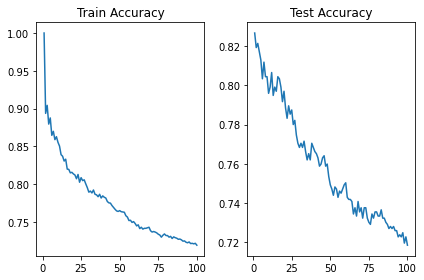

In [23]:
print(f"best i is {best_i} with \ntest_accuracy = {best_test_accuracy}\ntrain accuracy = {accuracy_score(ytrain, model.predict(xtrain))}")
fig, a =  plt.subplots(1,2)
a[0].plot(neighbors_range, train_accuracy)
a[0].set_title('Train Accuracy')
a[1].plot(neighbors_range, test_accuracy)
a[1].set_title('Test Accuracy')
fig.tight_layout()
plt.show()


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [11]:
mlp = MLPClassifier(
    max_iter=1000,
    alpha=0.1,
    activation='logistic',
    solver='adam',
    random_state=42
)
mlp.fit(xtrain, ytrain)

mlp_predict = mlp.predict(xtest)
print('MLP Accuracy: {:.2f}%'.format(accuracy_score(ytest, mlp_predict) * 100))

MLP Accuracy: 98.19%
